In [2]:
#
# libraries
#
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#

In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\bbate\Miniconda3\envs\keras-gpu-3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 

In [3]:
#
# load data
#
weather_data = pd.read_csv('Datasets\\austin_weather.csv')
#
weather_data.head()
#

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [4]:
#
# drop the Date column as we will consider this a classification problem
#
weather_data.drop(columns = ['Date'], inplace = True)
#
# list the unique values of the target
#
weather_data['Events'].unique()
#

array(['Rain , Thunderstorm', ' ', 'Rain', 'Fog', 'Rain , Snow',
       'Fog , Rain', 'Thunderstorm', 'Fog , Rain , Thunderstorm',
       'Fog , Thunderstorm'], dtype=object)

In [5]:
#
# replace the ' ' with 'None'
#
weather_data['Events'] = ['None' 
                          if weather_data['Events'][i] is ' '
                         else weather_data['Events'][i]
                         for i in range(weather_data.shape[0])]
weather_data.head()
#

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,None
2,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,None
3,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,None
4,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,None


In [6]:
#
# split the data into train, val, and test splits at 0.7, 0.2, and 0.1
#
train_X, val_X, train_y, val_y = train_test_split(weather_data.drop(columns = 'Events'), weather_data['Events'],
                                                 train_size = 0.7,
                                                 test_size = 0.2,
                                                 random_state = 42)
#
# get the indices of the two splits
#
train_val = list(train_X.index) + list(val_X.index)
#
# test set is therefore the indices not yet used
#
test_X = weather_data.drop(columns = 'Events').drop(train_val, axis = 0)
test_y = weather_data.iloc[test_X.index, :]
#
# verify what we wanted
#
print('train set is ', '{:.2%}'.format(train_X.shape[0] / weather_data.shape[0]),
      '\nval set is ', '{:.2%}'.format(val_X.shape[0] / weather_data.shape[0]),
      '\ntest set is ', '{:.2%}'.format(test_X.shape[0] / weather_data.shape[0]))
print('train rows in val set: ', sum([list(train_X.index)[i] in list(val_X.index) 
                                      for i in range(len(train_X.index))]))
print('train rows in test set: ', sum([list(train_X.index)[i] in list(test_X.index) 
                                       for i in range(len(train_X.index))]))
print('val rows in test set: ', sum([list(val_X.index)[i] in list(test_X.index) 
                                     for i in range(len(val_X.index))]))

train set is  69.98% 
val set is  20.02% 
test set is  10.01%
train rows in val set:  0
train rows in test set:  0
val rows in test set:  0


In [7]:
val_X.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
677,81,66,51,64,54,49,96,66,35,29.97,29.89,29.83,10,10,10,12,4,18,0
1046,91,81,71,73,71,64,100,72,44,30.04,29.98,29.9,10,9,1,15,5,22,0.33
610,101,89,76,76,72,65,94,64,33,30.05,29.97,29.91,10,10,10,12,5,18,0
49,65,51,37,42,36,29,85,63,40,30.26,30.17,30.03,10,7,3,14,5,21,0
1284,91,81,71,74,72,67,100,75,50,30.05,30,29.9,10,7,2,20,3,30,0.01


In [8]:
#
# load stock data (time series)
#
stock_data = pd.read_csv('Datasets\\spx.csv')
#
stock_data.date = pd.to_datetime(stock_data.date)
stock_data.head()
#

,date,close
0,1986-01-02,209.59
1,1986-01-03,210.88
2,1986-01-06,210.65
3,1986-01-07,213.80
4,1986-01-08,207.97


In [9]:
#
# split the stock data into a train and val set
# with the val data being the last 9 months of the data
# and the training data being after 12-31-2009
#
# inspect the dates
#
stock_data['date'].describe()
#

count                    8192
unique                   8192
top       1989-12-27 00:00:00
freq                        1
first     1986-01-02 00:00:00
last      2018-06-29 00:00:00
Name: date, dtype: object

In [10]:
#
train_data = stock_data[(stock_data['date'] < '2017-10-01') & (stock_data['date'] > '2009-12-31')]
val_data = stock_data[stock_data['date'] >= '2017-10-01']
#

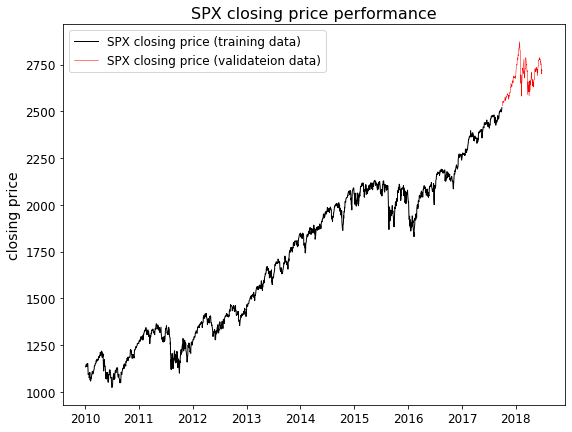

In [11]:
#
# visualize the result
#
fig, ax = plt.subplots(figsize = (9, 7))
ax.plot(train_data.date, train_data.close, 
        color = 'black', 
        lw = 1, 
        label = 'SPX closing price (training data)')
ax.plot(val_data.date, 
        val_data.close, 
        color = 'red', 
        lw = 0.5, 
        label = 'SPX closing price (validateion data)')
ax.set_title('SPX closing price performance', fontsize = 16)
ax.set_ylabel('closing price', fontsize = 14)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()
#